In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 회귀 성능 튜닝
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# 회귀 평가
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

# 딥러닝
import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore') # pd 경고메시지 생략

In [35]:
# df = pd.read_csv('./data/df.csv')
df = joblib.load('./data/df.pkl')
df.head()

drop_col = '7days_waiting_time'
df = df.drop(drop_col, axis=1)

df = df.astype('float')

In [36]:
target = 'target'

x = df.drop(target, axis=1)
y = df.loc[:,target]

In [37]:
# 가변수화
dumm_cols = ['year','month','week','weekday','holiday']
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

In [38]:
display(x.head(2))
display(y.head(2))

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),...,week_51.0,week_52.0,week_53.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,holiday_1.0
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213.0,1023.0,924.0,23.2,2427.0,10764.0,-2.0,-8.9,0.0,63.0,...,0,0,0,0,0,1,0,0,0,1
2015-01-02,420.0,3158.0,2839.0,17.2,2216.0,8611.0,2.4,-9.2,0.0,73.0,...,0,0,0,0,0,0,1,0,0,0


time
2015-01-01    17.2
2015-01-02    26.2
Name: target, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 92, shuffle=False)

x_train.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),...,week_51.0,week_52.0,week_53.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,holiday_1.0
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213.0,1023.0,924.0,23.2,2427.0,10764.0,-2.0,-8.9,0.0,63.0,...,0,0,0,0,0,1,0,0,0,1
2015-01-02,420.0,3158.0,2839.0,17.2,2216.0,8611.0,2.4,-9.2,0.0,73.0,...,0,0,0,0,0,0,1,0,0,0
2015-01-03,209.0,1648.0,1514.0,26.2,2377.0,10198.0,8.2,0.2,0.0,89.0,...,0,0,0,0,0,0,0,1,0,1
2015-01-04,196.0,1646.0,1526.0,24.5,2431.0,10955.0,7.9,-0.9,0.0,95.0,...,0,0,0,0,0,0,0,0,1,1
2015-01-05,421.0,4250.0,3730.0,26.2,2214.0,8663.0,4.1,-7.4,3.4,98.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# x_train, x_test, y_train, y_test = train_test_split(x.iloc[:,5:11],y, test_size= 92, shuffle=False)

In [41]:
x_train

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),...,week_51.0,week_52.0,week_53.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,holiday_1.0
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213.0,1023.0,924.0,23.2,2427.0,10764.0,-2.0,-8.9,0.0,63.0,...,0,0,0,0,0,1,0,0,0,1
2015-01-02,420.0,3158.0,2839.0,17.2,2216.0,8611.0,2.4,-9.2,0.0,73.0,...,0,0,0,0,0,0,1,0,0,0
2015-01-03,209.0,1648.0,1514.0,26.2,2377.0,10198.0,8.2,0.2,0.0,89.0,...,0,0,0,0,0,0,0,1,0,1
2015-01-04,196.0,1646.0,1526.0,24.5,2431.0,10955.0,7.9,-0.9,0.0,95.0,...,0,0,0,0,0,0,0,0,1,1
2015-01-05,421.0,4250.0,3730.0,26.2,2214.0,8663.0,4.1,-7.4,3.4,98.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,642.0,5947.0,5039.0,45.5,2236.0,8529.0,27.7,14.1,0.0,86.0,...,0,0,0,0,0,0,0,0,0,0
2022-09-27,667.0,6044.0,5087.0,43.6,2238.0,8585.0,25.8,16.3,0.0,84.0,...,0,0,0,1,0,0,0,0,0,0
2022-09-28,670.0,6182.0,5176.0,44.7,2258.0,8751.0,26.3,16.5,0.0,92.0,...,0,0,0,0,1,0,0,0,0,0


# 머신러닝

In [42]:
LR_model = LinearRegression()
KN_model = KNeighborsRegressor()
Tree_model = DecisionTreeRegressor()
RanF_model = RandomForestRegressor()
xg_model = XGBRegressor()
lg_model = LGBMRegressor()

models = {'LR_model':LR_model,
        'KN_model':KN_model,
        'Tree_model':Tree_model,
        'RanF_model':RanF_model,
        'xg_model':xg_model,
        'lg_model':lg_model}

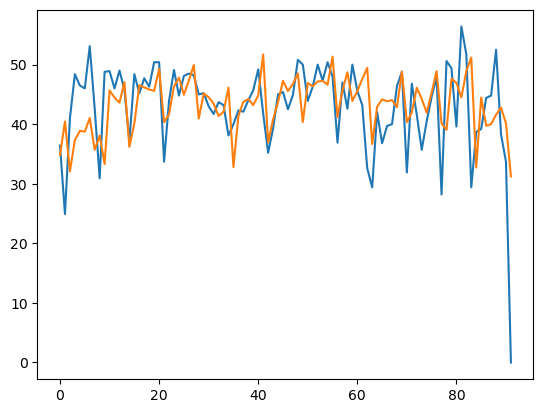

LR_model
MAE: 5.053185285322601
MAPE: 1529340416739568.2
r2: 0.11249606583044691


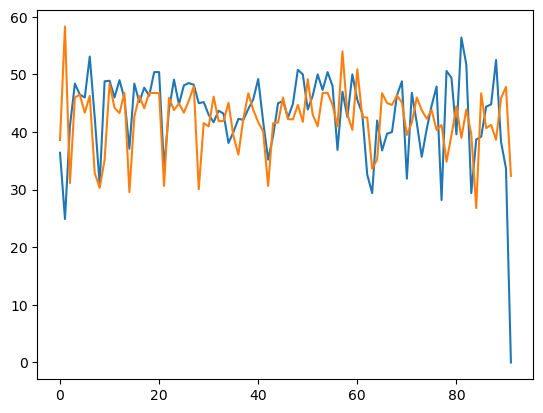

KN_model
MAE: 5.69891304347826
MAPE: 1585071260154963.5
r2: -0.13905171772709735


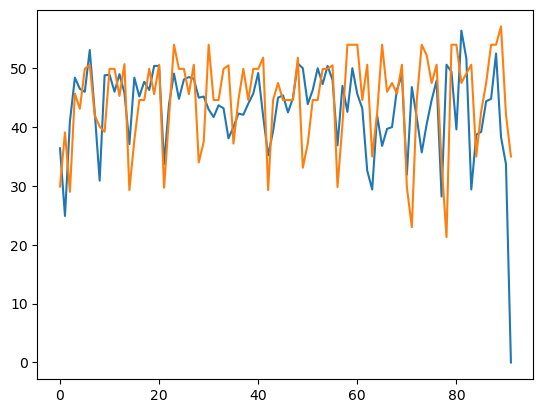

Tree_model
MAE: 6.501086956521738
MAPE: 1713325945195297.5
r2: -0.46050219080941224


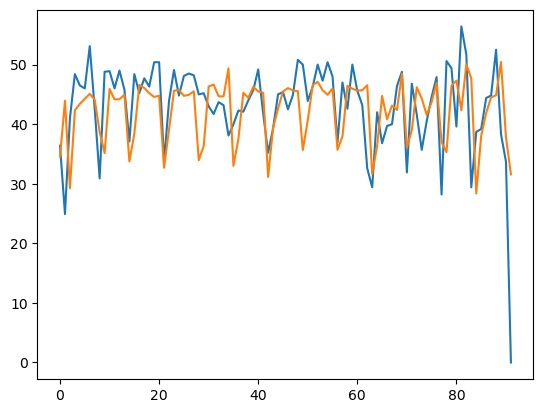

RanF_model
MAE: 5.113184782608696
MAPE: 1545664763415473.5
r2: 0.08319528401689769


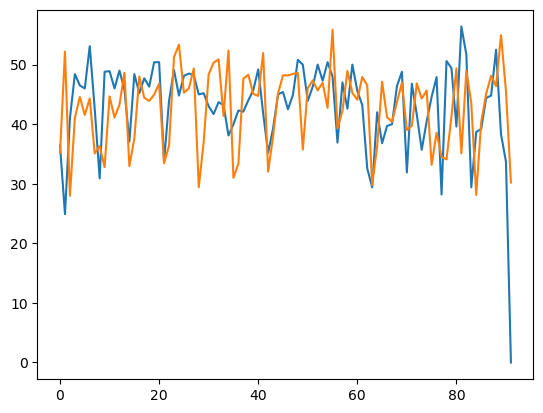

xg_model
MAE: 6.554809989099915
MAPE: 1478645477494250.0
r2: -0.29366087363553617
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2717
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 88
[LightGBM] [Info] Start training from score 40.202614


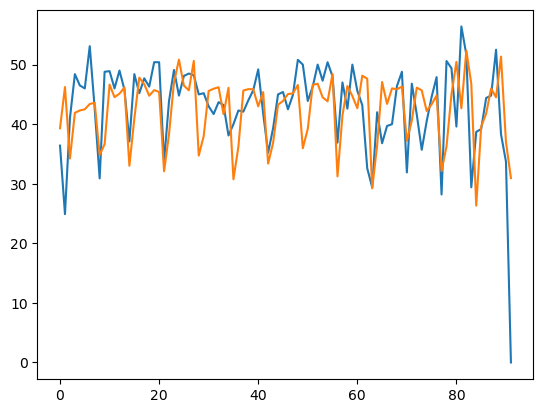

lg_model
MAE: 5.251531819592938
MAPE: 1515122737262632.8
r2: 0.08339720036267806


In [43]:
results = []
for name, model in models.items():
    print("="*50)
    if model != 'KN_model':
        model.fit(x_train, y_train) # 모델 학습
        y_pred = model.predict(x_test) # 모델 예측
        model_mae = mae(y_test, y_pred)
        model_mape = mape(y_test, y_pred)
        model_r2 = r2_score(y_test, y_pred)
    else:
        model.fit(x_train_s, y_train)
        y_pred = model.predict(x_test_s)
        model_mae = mae(y_test, y_pred)
        model_mape = mape(y_test, y_pred)
        model_r2 = r2_score(y_test, y_pred)
        
    plt.plot(np.array(y_test))
    plt.plot(y_pred)
    plt.show()
    print(name)
    print('MAE:', model_mae)
    print('MAPE:', model_mape)
    print('r2:', model_r2)
    
    results.append([name, (model_mae, model_mape, model_r2)])

In [44]:
sorted(results, key=lambda x: x[1][2])

[['Tree_model', (6.501086956521738, 1713325945195297.5, -0.46050219080941224)],
 ['xg_model', (6.554809989099915, 1478645477494250.0, -0.29366087363553617)],
 ['KN_model', (5.69891304347826, 1585071260154963.5, -0.13905171772709735)],
 ['RanF_model', (5.113184782608696, 1545664763415473.5, 0.08319528401689769)],
 ['lg_model', (5.251531819592938, 1515122737262632.8, 0.08339720036267806)],
 ['LR_model', (5.053185285322601, 1529340416739568.2, 0.11249606583044691)]]

# 딥러닝

In [45]:
print(f"X shape : {x_train.shape}")
print(f"Y shape : {y_train.shape}")

X shape : (2831, 89)
Y shape : (2831,)


In [46]:
# 또 다른 딥러닝 모델
# 입력 레이어 정의
X = tf.keras.Input(shape=[89])

# 은닉 레이어 
H = tf.keras.layers.Dense(256)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

# 여기 부분이 skip connection 레이어층 쌓기 부분
for i in range(10):
    H1 = tf.keras.layers.Dropout(0.6)(H)
    H1 = tf.keras.layers.Dense(512)(H1)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H1 = tf.keras.layers.Activation("ReLU")(H1)
    
    H1 = tf.keras.layers.Dropout(0.6)(H1)
    H1 = tf.keras.layers.Dense(256)(H1)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H = tf.keras.layers.Add()([H,H1])
    H = tf.keras.layers.Activation("ReLU")(H)

# 출력 레이어 (회귀 모델이므로 활성화 함수는 'linear' 사용)
Y = tf.keras.layers.Dense(1, activation="linear")(H)

# 모델 생성
dp_model = tf.keras.Model(X, Y)
 
# 모델 컴파일 (손실 함수와 평가 지표 수정)
dp_model.compile(loss='mean_squared_error', metrics=['mean_absolute_error'], optimizer = 'Adam')

# 모델 요약
dp_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 89)]                 0         []                            
                                                                                                  
 dense_249 (Dense)           (None, 256)                  23040     ['input_9[0][0]']             
                                                                                                  
 batch_normalization_241 (B  (None, 256)                  1024      ['dense_249[0][0]']           
 atchNormalization)                                                                               
                                                                                                  
 activation_241 (Activation  (None, 256)                  0         ['batch_normalization_24

 )                                                                                                
                                                                                                  
 dropout_237 (Dropout)       (None, 256)                  0         ['activation_247[0][0]']      
                                                                                                  
 dense_256 (Dense)           (None, 512)                  131584    ['dropout_237[0][0]']         
                                                                                                  
 batch_normalization_248 (B  (None, 512)                  2048      ['dense_256[0][0]']           
 atchNormalization)                                                                               
                                                                                                  
 activation_248 (Activation  (None, 512)                  0         ['batch_normalization_248[0][0
 )        

                                                                                                  
 dropout_244 (Dropout)       (None, 512)                  0         ['activation_254[0][0]']      
                                                                                                  
 dense_263 (Dense)           (None, 256)                  131328    ['dropout_244[0][0]']         
                                                                                                  
 batch_normalization_255 (B  (None, 256)                  1024      ['dense_263[0][0]']           
 atchNormalization)                                                                               
                                                                                                  
 add_110 (Add)               (None, 256)                  0         ['activation_253[0][0]',      
                                                                     'batch_normalization_255[0][0
          

                                                                                                  
 activation_261 (Activation  (None, 256)                  0         ['add_113[0][0]']             
 )                                                                                                
                                                                                                  
 dense_270 (Dense)           (None, 1)                    257       ['activation_261[0][0]']      
                                                                                                  
Total params: 2684161 (10.24 MB)
Trainable params: 2668289 (10.18 MB)
Non-trainable params: 15872 (62.00 KB)
__________________________________________________________________________________________________


In [47]:
# 콜백함수 만들기
early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                        min_delta = 0, # 이보다 작게 변하면 변한다고 안할거임.
                                        patience = 15, # 이 회수(epoch)동안 개선이 없으면 끝냄
                                        restore_best_weights=True)
# 모델 학습
result = dp_model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early])

Epoch 1/1000
71/71 [==============================] - 13s 58ms/step - loss: 723.0458 - mean_absolute_error: 21.5067 - val_loss: 3381.7002 - val_mean_absolute_error: 38.3138
Epoch 2/1000
71/71 [==============================] - 3s 42ms/step - loss: 167.2473 - mean_absolute_error: 10.0660 - val_loss: 492.3273 - val_mean_absolute_error: 19.8086
Epoch 3/1000
71/71 [==============================] - 3s 44ms/step - loss: 147.2946 - mean_absolute_error: 9.3319 - val_loss: 223.9336 - val_mean_absolute_error: 11.6125
Epoch 4/1000
71/71 [==============================] - 3s 44ms/step - loss: 139.7683 - mean_absolute_error: 9.0224 - val_loss: 114.0917 - val_mean_absolute_error: 7.8487
Epoch 5/1000
71/71 [==============================] - 3s 43ms/step - loss: 134.3657 - mean_absolute_error: 8.7776 - val_loss: 162.9838 - val_mean_absolute_error: 9.7439
Epoch 6/1000
71/71 [==============================] - 3s 48ms/step - loss: 131.3538 - mean_absolute_error: 8.6486 - val_loss: 123.4483 - val_mean_ab

In [48]:
# 모델 평가하기
dp_model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 12ms/step - loss: 50.6025 - mean_absolute_error: 5.2401


[50.602474212646484, 5.240072727203369]

In [51]:
# 예측하기
y_pred = dp_model.predict(x_test)

print('MAE:', mae(y_test, y_pred))
print('MAPE:', mape(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

3/3 [==============================] - 0s 9ms/step
MAE: 5.2400716284047
MAPE: 1460025673839838.8
r2_score: 0.11427244190177444


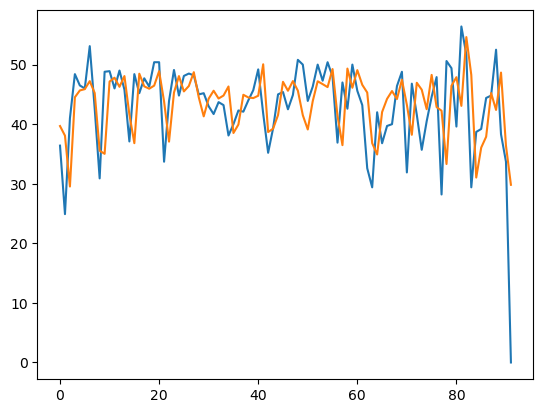

In [50]:
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.show()